# Getting started - Requirements
Python (🐍):  This assumes that you have a python environment installed. If you haven't, we recommend installing [Anaconda](https://docs.anaconda.com/anaconda/install/).

FPsim (♀️): This tutorial uses [FPsim v2.0](https://github.com/fpsim/fpsim/tree/rc2.0-methodtime). 

To install, you first need to clone or download the a copy of the source code from https://github.com/fpsim/fpsim/
 
```
git clone -b rc2.0-methodtime --single-branch https://github.com/fpsim/fpsim.git
cd fpsim
pip install -e .
```

If it worked, you should be able to import fpsim with `import fpsim as fp`.

<div class="alert alert-info">
    
An interactive version of this notebook is available on [Google Colab](https://colab.research.google.com/github/fpsim/fpsim/blob/main/docs/tutorials/T3_intervention_methods.ipynb?install=fpsim) or [Binder](https://mybinder.org/v2/gh/fpsim/fpsim/HEAD?labpath=docs%2Ftutorials%2FT3_intervention_methods.ipynb).
    
</div>

# Interventions 

At this point, you should now be able to run a single sim, using default or custom parameters and plot the results. In this tutorial, you will learn how to use interventions.

First, define the basic parmeters as you learned in the previous tutorial.

In [1]:
import fpsim as fp
import sciris as sc

pars = dict(
    n_agents   = 1_000,
    location   = 'kenya',
    start_year = 2000, 
    end_year   = 2020,
    exposure_factor = 1.0  # Overall scale factor on probability of becoming pregnant
)
method_choice = fp.RandomChoice(location=pars['location'])  

C:\github\fpsimtostarsim\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define multiple types of interventions

It is typical to want to test many interventions and compared with a baseline simulation wihtout the intervention. FPsim has the MultiSim class which handles the running of multiple simulations, and provides mechanisms to plot the results together to facilitate comparison. We will use this class here. But first, let's define each of our individual simulations. To distiguish each simulation in the plots, we will pass one more argument to the sim: its 'label'. In this tutorial, we will define a baseline scenario and three different types of interventions, then run them all together

### 1. A simulation without intervention (baseline)
We define our baseline simulation as s1, without any interventions.

Initializing sim with 1000 agents


———————————————————————————————————————————————
  Running "Baseline": 2000.0 ( 0/241) (0.00 s) 
———————————————————————————————————————————————



———————————————————————————————————————————————
  Running "Baseline": 2000.1 ( 1/241) (0.01 s) 
———————————————————————————————————————————————



———————————————————————————————————————————————
  Running "Baseline": 2000.2 ( 2/241) (0.03 s) 
———————————————————————————————————————————————



———————————————————————————————————————————————
  Running "Baseline": 2000.2 ( 3/241) (0.04 s) 
———————————————————————————————————————————————



———————————————————————————————————————————————
  Running "Baseline": 2000.3 ( 4/241) (0.05 s) 
———————————————————————————————————————————————



———————————————————————————————————————————————
  Running "Baseline": 2000.4 ( 5/241) (0.07 s) 
———————————————————————————————————————————————



———————————————————————————————————————————————
  Running "Baseline": 2000.5 ( 6/2

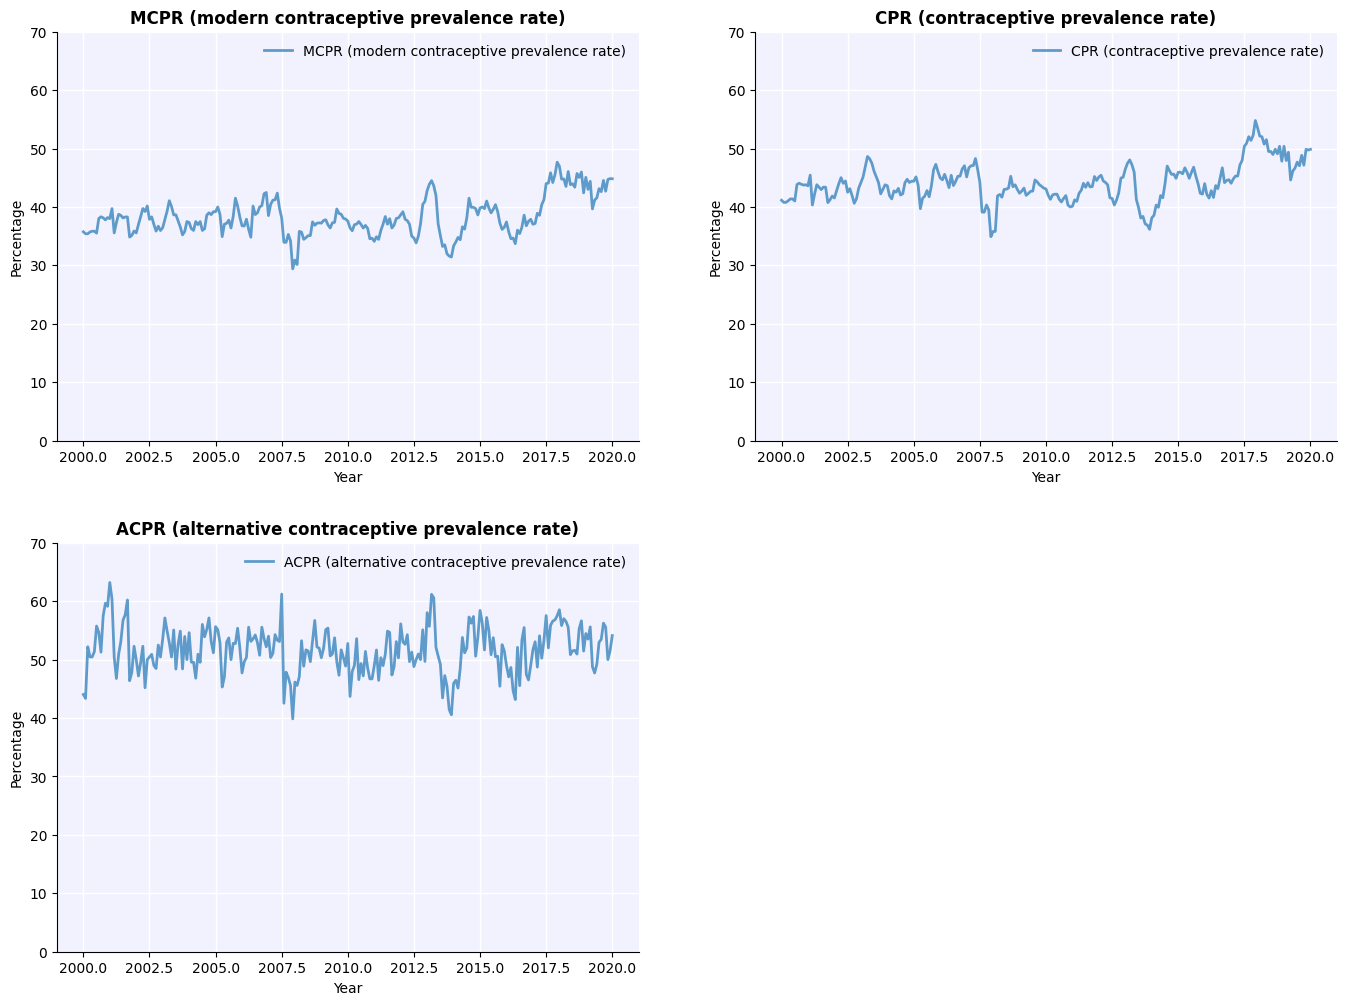

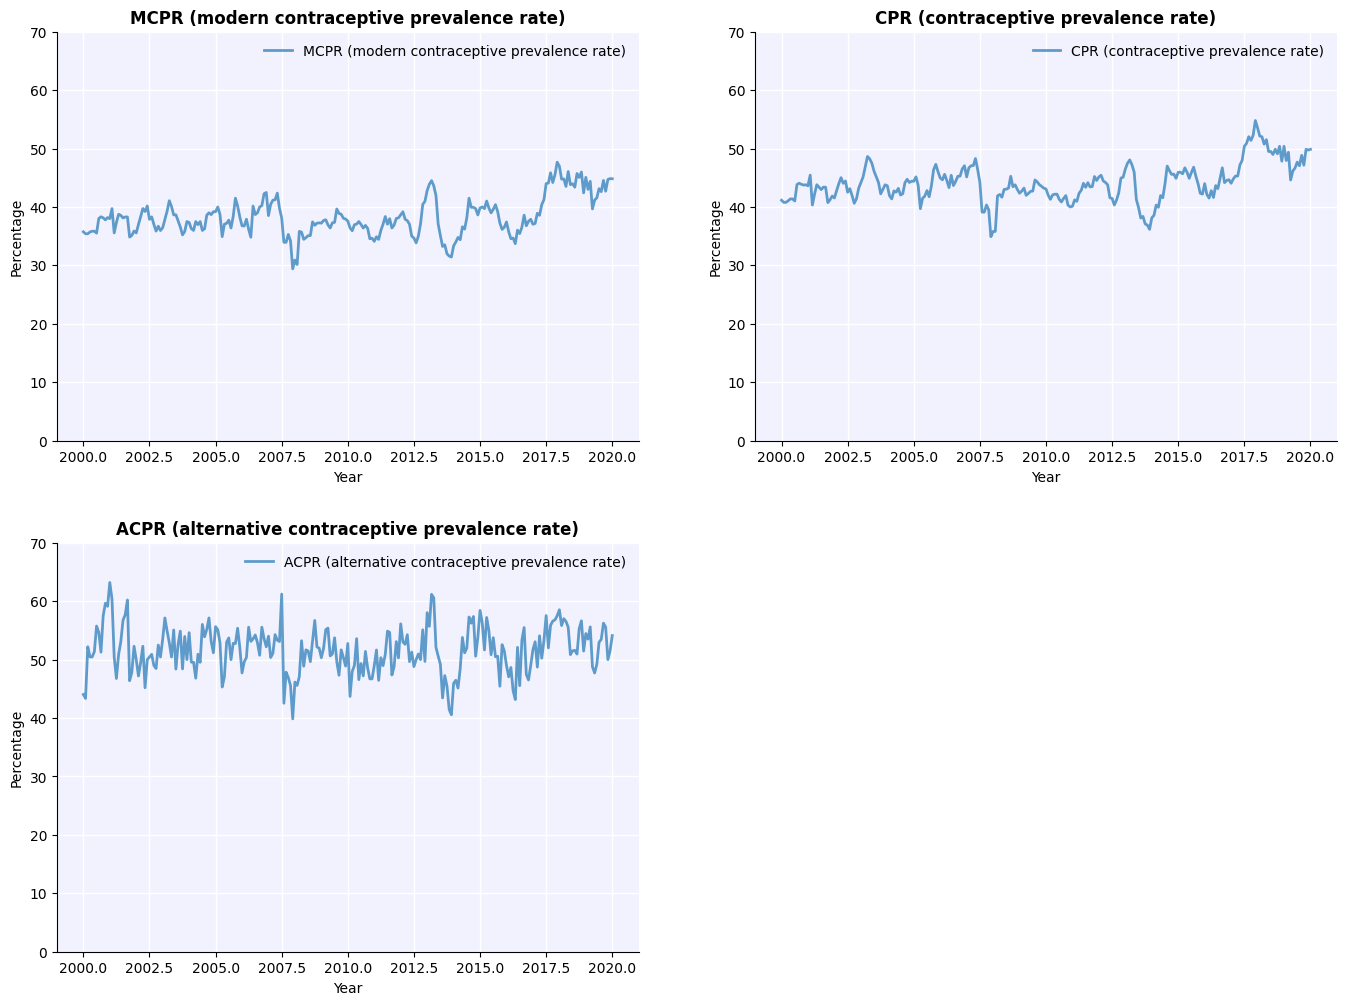

In [4]:
s1 = fp.Sim(pars=pars, contraception_module=method_choice, label="Baseline")

### 2. A simulation with an intervention that changes the EFFICACY of a method

First, let's have a look at which contraceptive methods we have available.

In [6]:
Methods = fp.make_methods().Methods
for method in Methods.values(): print(f"{method.idx}: {method.label}")

0: None
1: Pill
2: IUDs
3: Injectables
4: Condoms
5: BTL
6: Withdrawal
7: Implants
8: Other traditional
9: Other modern


Then, let's add an intervention that changes the efficacy of injectables, and create a new sim with that intervention, called s2.

Initializing sim with 1000 agents


—————————————————————————————————————————————————————————————————
  Running "More effective Injectables": 2000.0 ( 0/241) (0.00 s) 
—————————————————————————————————————————————————————————————————



—————————————————————————————————————————————————————————————————
  Running "More effective Injectables": 2000.1 ( 1/241) (0.01 s) 
—————————————————————————————————————————————————————————————————



—————————————————————————————————————————————————————————————————
  Running "More effective Injectables": 2000.2 ( 2/241) (0.03 s) 
—————————————————————————————————————————————————————————————————



—————————————————————————————————————————————————————————————————
  Running "More effective Injectables": 2000.2 ( 3/241) (0.04 s) 
—————————————————————————————————————————————————————————————————



—————————————————————————————————————————————————————————————————
  Running "More effective Injectables": 2000.3 ( 4/241) (0.06 s) 
————————————————————————————

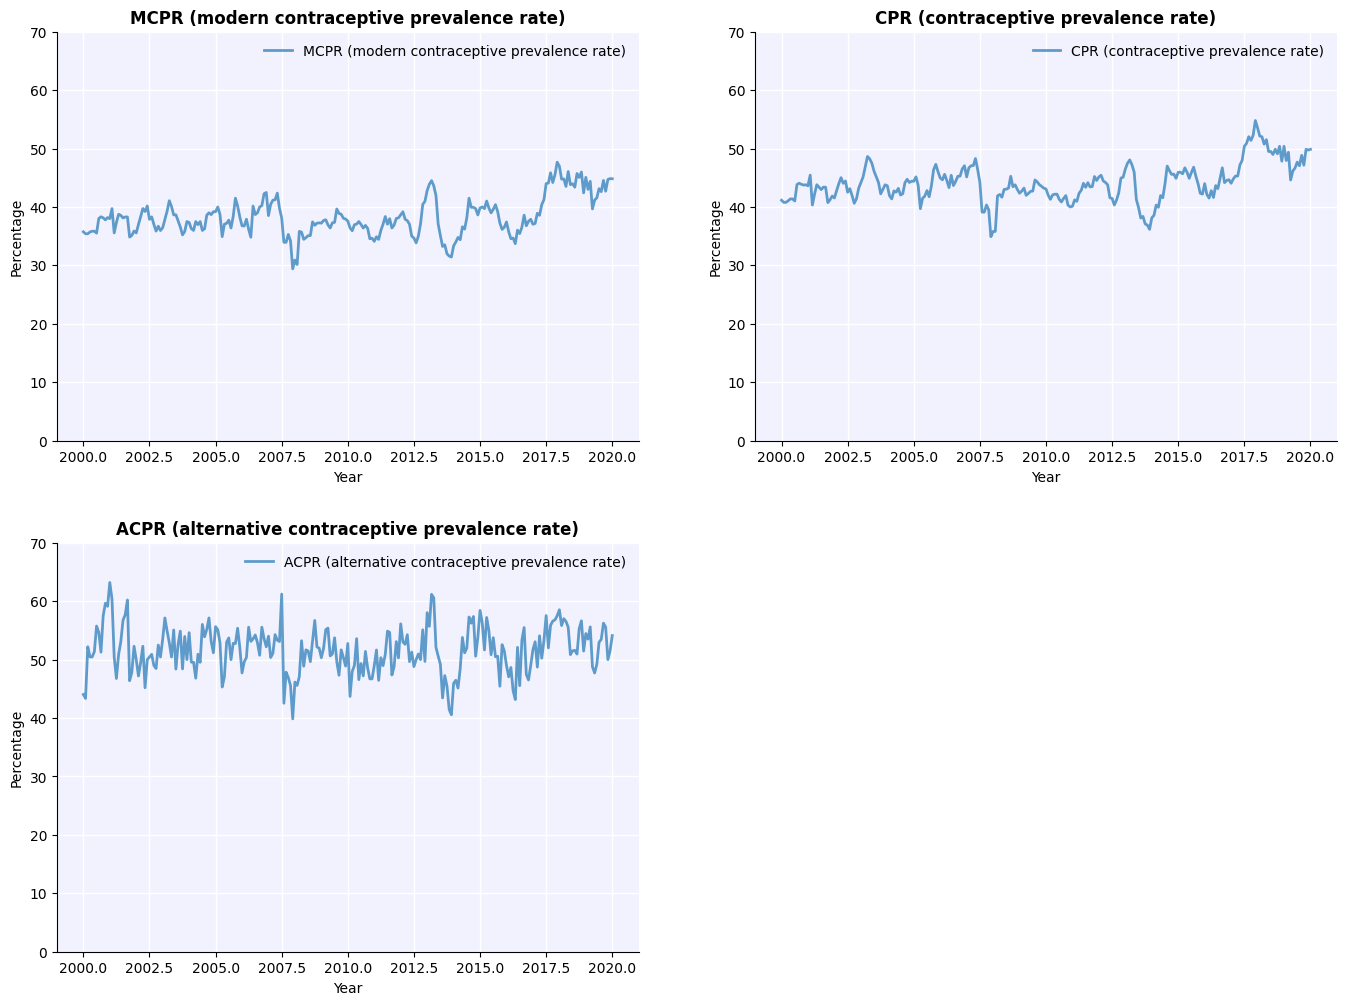

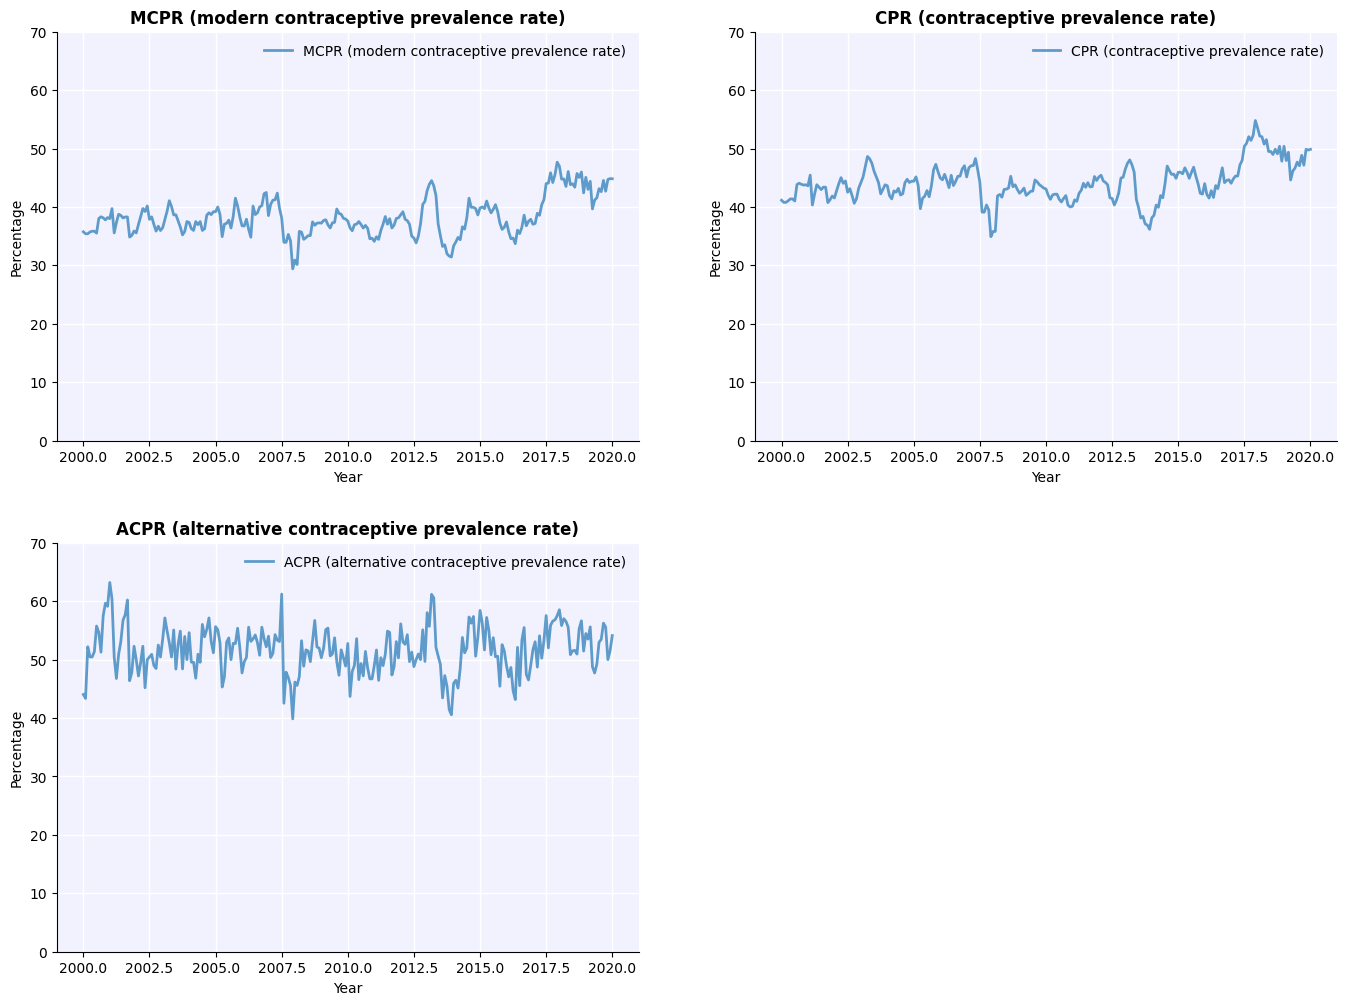

In [7]:
change_efficacy_intervention = fp.update_methods(eff={"Injectables": 0.99}, year=2010)  # new efficacy starts in 2010

s2 = fp.Sim(pars=pars, contraception_module=method_choice, 
                 interventions=change_efficacy_intervention, 
                 label="More effective Injectables")

### 3. A simulation with an intervention that changes the distribution of DURATIONS on the method


Now, let's try changing a different aspect of the method: the distribution of time-on-method, which is how we specify the duration women use a method. Time-on-method is parameterized as a distribution, which can be either exponential, lognormal, loglogistic, gamma, or weibull. Which distribution is selected for each contraceptiove method, as well as the default parameters used to inform the distribution, is calucalted based on an analysis of DHS calendar data. This analysis is shown in `time_on_method.R` in the <i>locations/data_processing</i> folder. To impact the duration of use manually, you can set the relevant parameters manually: 

In [ ]:
# The baseline duration for Injectables is a lognormal with parameter par1=2, and par2=3
change_duration_intervention = fp.update_methods(dur_use={'Injectables': dict(dist='lognormal', par1=3, par2=0.2)}, year=2010) 

# Define a simulaiton for this intervention called s3
s3 = fp.Sim(pars=pars, contraception_module=method_choice, 
                 interventions=change_duration_intervention, 
                 label="Longer time on Injectables")

### 4. A simulation with an intervention that changes the METHOD MIX 
Finally, let's add a scenrio that impacts the method mix, or the probability of selecting a specific method when a woman starts using one. Method mix is defined as a set of matrices, depending on the method she used previously, her postpartum status, and age. This intervention replaces all of those with a single matrix that you define. It is a set of numbers representing the percent of women that will choose (in this order):
* Pill
* IUD
* Injectable
* Condom
* BTL
* Withdrawal
* Implant
* Other traditional
* Other modern

You can specify the percent who chooses each of these methods, and the year to start using this percentage, as follows:

In [ ]:
# The values in method_mix should add up to 1, but if they don't, the intervention update_methods() will autamotailly normalize them to add up to 1. 
change_mix = fp.update_methods(method_mix=[0.25, 0.05, 0.05, 0.0, 0.05, 0.3, 0.1, 0.1, 0.0], year=2010.0)

# Define a simulation for this intervention called s4
s4 = fp.Sim(pars=pars, contraception_module=method_choice, 
            interventions=change_mix, 
            label='Different mix')

# Run multiple simulations
To run all of these simulations together, create a list of all the simulations you want to include, the use msim to run a multisim analysis as follows:

In [ ]:
simlist = sc.autolist([s1, s2, s3, s4])
msim = fp.MultiSim(sims=simlist)
msim.run(parallel=False, compute_stats=False)

Plot contraceptive use for all of the simulations you just ran. 

In [ ]:
msim.plot(to_plot='cpr');